In [2]:
import json
import itertools
import os
import sys
import pac
import mne
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)


import simple_pipeline as sp


def mmn_sub_calculation(task):
    raw = mne.io.read_raw_eeglab(os.path.join(task['dir'], 'pre_' + task['file_formatter'].format('eeg.set')),
                                 preload=True, verbose=0)
    for ch in raw._data:
        ch -= ch.mean()
        ch /= ch.std()
        ch *= 1e-6
   
    montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
    raw.set_montage(montage)

    events, event_dict = mne.events_from_annotations(raw, verbose=0)
    epochs = mne.Epochs(raw, events, event_id=event_dict,
                        tmin=-0.2, tmax=1, preload=True, verbose=0)


    selected_events = ['S200', 'S201', 'S202']
    erps = {}
    for ev in selected_events:
        erps[ev] = epochs[ev].average()


    erp_df_s200 = erps['S200'].to_data_frame()
    erp_df = erp_df_s200.set_index('time')

    erp_df_s201 = erps['S201'].to_data_frame()
    erp_df = erp_df_s201.set_index('time')

    erp_df_s202 = erps['S202'].to_data_frame()
    erp_df = erp_df_s202.set_index('time') 
    
    Tr = erp_df_s200-erp_df_s201
    Nov = erp_df_s202-erp_df_s201
    return Tr,Nov, erp_df_s200,erp_df_s201, erp_df_s202



# Show and compare ERP between different types of indivisuals 

In [2]:
tasks_df = sp.create_tasks_df('D:\Mastersharif\MasterProject\data\parkinsons-oddball')
tasks_df

,participant_id,pd_drug_type,isMale,age,dir,file,file_formatter,path
0,sub-001,1,True,75,D:\Mastersharif\MasterProject\data\parkinsons-...,sub-001_ses-01_eeg_sub-001_ses-01_task-Rest_ee...,sub-001_ses-01_task-Rest_{},D:\Mastersharif\MasterProject\data\parkinsons-...
1,sub-001,0,True,75,D:\Mastersharif\MasterProject\data\parkinsons-...,sub-001_ses-02_eeg_sub-001_ses-02_task-Rest_ee...,sub-001_ses-02_task-Rest_{},D:\Mastersharif\MasterProject\data\parkinsons-...
2,sub-002,1,True,79,D:\Mastersharif\MasterProject\data\parkinsons-...,sub-002_ses-01_eeg_sub-002_ses-01_task-Rest_ee...,sub-002_ses-01_task-Rest_{},D:\Mastersharif\MasterProject\data\parkinsons-...
3,sub-002,0,True,79,D:\Mastersharif\MasterProject\data\parkinsons-...,sub-002_ses-02_eeg_sub-002_ses-02_task-Rest_ee...,sub-002_ses-02_task-Rest_{},D:\Mastersharif\MasterProject\data\parkinsons-...
4,sub-003,2,False,83,D:\Mastersharif\MasterProject\data\parkinsons-...,sub-003_ses-01_eeg_sub-003_ses-01_task-Rest_ee...,sub-003_ses-01_task-Rest_{},D:\Mastersharif\MasterProject\data\parkinsons-...
...,...,...,...,...,...,...,...,...
70,sub-046,2,True,75,D:\Mastersharif\MasterProject\data\parkinsons-...,sub-046_ses-01_eeg_sub-046_ses-01_task-Rest_ee...,sub-046_ses-01_task-Rest_{},D:\Mastersharif\MasterProject\data\parkinsons-...
71,sub-047,2,True,73,D:\Mastersharif\MasterProject\data\parkinsons-...,sub-047_ses-01_eeg_sub-047_ses-01_task-Rest_ee...,sub-047_ses-01_task-Rest_{},D:\Mastersharif\MasterProject\data\parkinsons-...
72,sub-048,2,True,75,D:\Mastersharif\MasterProject\data\parkinsons-...,sub-048_ses-01_eeg_sub-048_ses-01_task-Rest_ee...,sub-048_ses-01_task-Rest_{},D:\Mastersharif\MasterProject\data\parkinsons-...
73,sub-049,2,True,69,D:\Mastersharif\MasterProject\data\parkinsons-...,sub-049_ses-01_eeg_sub-049_ses-01_task-Rest_ee...,sub-049_ses-01_task-Rest_{},D:\Mastersharif\MasterProject\data\parkinsons-...


<ipython-input-2-1144f863c364>:18: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(os.path.join(task['dir'], 'pre_' + task['file_formatter'].format('eeg.set')),
<ipython-input-2-1144f863c364>:18: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(os.path.join(task['dir'], 'pre_' + task['file_formatter'].format('eeg.set')),
<ipython-input-2-1144f863c364>:18: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(os.path.join(task['dir'], 'pre_' + task['file_formatter'].format('eeg.set')),


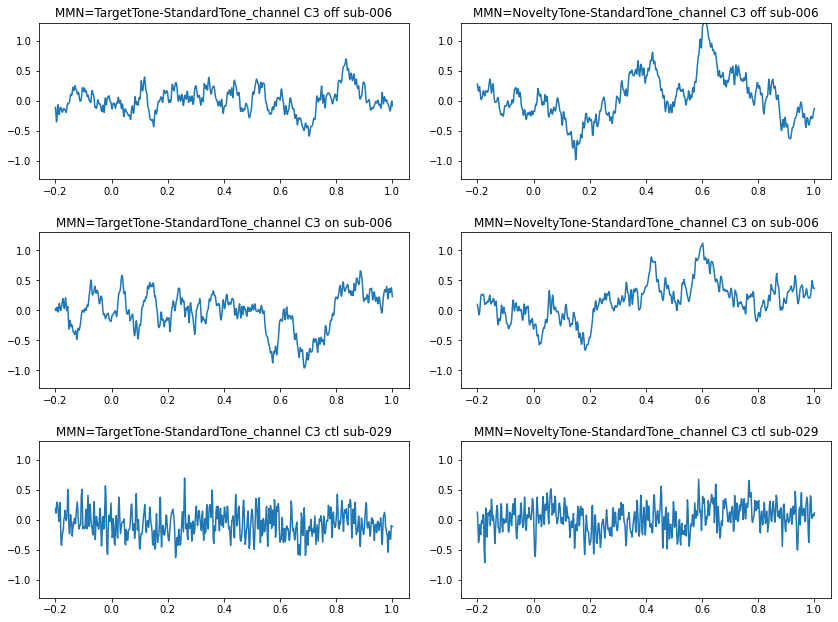

In [4]:
# on server we should remove the input given to create_taskss_df
tasks_df = sp.create_tasks_df('D:\Mastersharif\MasterProject\data\parkinsons-oddball')


temp = tasks_df['pd_drug_type']
index = 3
t = np.linspace(-0.2,1,601)

off_medication = temp[temp==0].index[index]
on_medication = temp[temp==1].index[index]
ctl = temp[temp==2].index[index]

Tr_off,Nov_off,_,_,_ = mmn_sub_calculation(tasks_df.iloc[off_medication])

Tr_on,Nov_on,_,_,_ = mmn_sub_calculation(tasks_df.iloc[on_medication])

Tr_ctl,Nov_ctl,_,_,_ = mmn_sub_calculation(tasks_df.iloc[ctl])

channel_name = 'C3'
range = 1.3
fig, ax = plt.subplots(3,2)
ax[0,0].plot(t,Tr_off[channel_name])
ax[0,0].set_title('MMN=TargetTone-StandardTone_channel {} off {}'.format(channel_name,tasks_df['participant_id'][off_medication]))
ax[0,0].set_ylim([-range,range])
ax[0,1].plot(t,Nov_off[channel_name])
ax[0,1].set_title('MMN=NoveltyTone-StandardTone_channel {} off {}'.format(channel_name,tasks_df['participant_id'][off_medication]))
ax[0,1].set_ylim([-range,range])
ax[1,0].plot(t,Tr_on[channel_name])
ax[1,0].set_title('MMN=TargetTone-StandardTone_channel {} on {}'.format(channel_name,tasks_df['participant_id'][on_medication]))
ax[1,0].set_ylim([-range,range])
ax[1,1].plot(t,Nov_on[channel_name])
ax[1,1].set_title('MMN=NoveltyTone-StandardTone_channel {} on {}'.format(channel_name,tasks_df['participant_id'][on_medication]))
ax[1,1].set_ylim([-range,range])
ax[2,0].plot(t,Tr_ctl[channel_name])
ax[2,0].set_title('MMN=TargetTone-StandardTone_channel {} ctl {}'.format(channel_name,tasks_df['participant_id'][ctl]))
ax[2,0].set_ylim([-range,range])
ax[2,1].plot(t,Nov_ctl[channel_name])
ax[2,1].set_title('MMN=NoveltyTone-StandardTone_channel {} ctl {}'.format(channel_name,tasks_df['participant_id'][ctl]))
ax[2,1].set_ylim([-range,range])
fig.tight_layout(pad=2.0)

# Load Data and ERP calculation 

<ipython-input-1-1144f863c364>:18: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(os.path.join(task['dir'], 'pre_' + task['file_formatter'].format('eeg.set')),
<ipython-input-1-1144f863c364>:18: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(os.path.join(task['dir'], 'pre_' + task['file_formatter'].format('eeg.set')),
<ipython-input-1-1144f863c364>:18: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(os.path.join(task['dir'], 'pre_' + task['file_formatter'].format('eeg.set')),


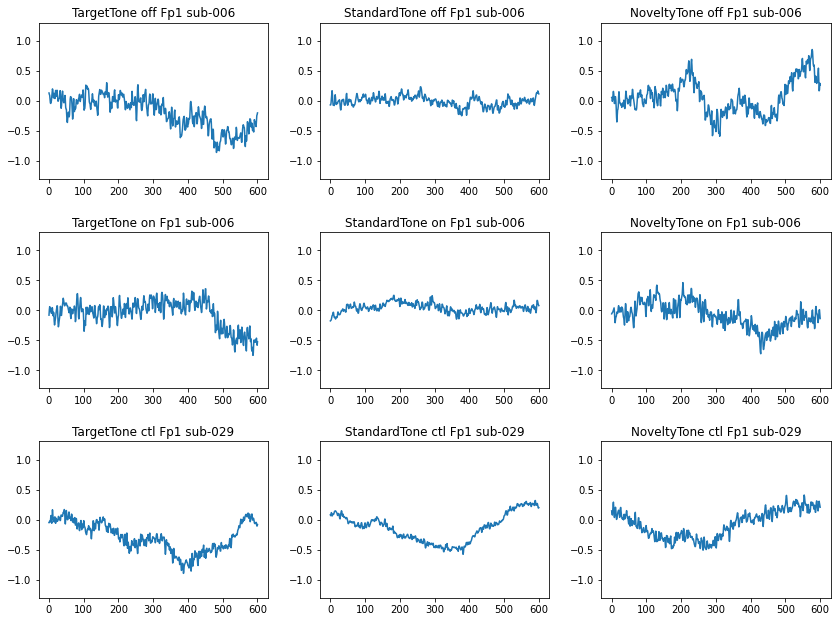

In [31]:
# To run on server we should remove the path given to the following functions
# tasks_df = sp.create_tasks_df('D:\Mastersharif\MasterProject\data\parkinsons-oddball')

# temp = tasks_df['pd_drug_type']

# off_medication = temp[temp==0].index[0]
# on_medication = temp[temp==1].index[0]
# ctl = temp[temp==2].index[0]


_,_,erp_df_s200_off, erp_df_s201_off, erp_df_s202_off = mmn_sub_calculation(tasks_df.iloc[off_medication])

_,_,erp_df_s200_on, erp_df_s201_on, erp_df_s202_on = mmn_sub_calculation(tasks_df.iloc[on_medication])

_,_,erp_df_s200_ctl, erp_df_s201_ctl, erp_df_s202_ctl = mmn_sub_calculation(tasks_df.iloc[ctl])

# channel_name = 'Fp1'

fig, ax = plt.subplots(3,3)
range = 1.3

ax[0,0].plot(erp_df_s200_off[channel_name])
ax[0,0].set_title('TargetTone off {} {}'.format(channel_name,tasks_df['participant_id'][off_medication]))
ax[0,0].set_ylim([-range,range])

ax[0,1].plot(erp_df_s201_off[channel_name])
ax[0,1].set_title('StandardTone off {} {}'.format(channel_name,tasks_df['participant_id'][off_medication]))
ax[0,1].set_ylim([-range,range])

ax[0,2].plot(erp_df_s202_off[channel_name])
ax[0,2].set_title('NoveltyTone off {} {}'.format(channel_name,tasks_df['participant_id'][off_medication]))
ax[0,2].set_ylim([-range,range])

ax[1,0].plot(erp_df_s200_on[channel_name])
ax[1,0].set_title('TargetTone on {} {}'.format(channel_name,tasks_df['participant_id'][on_medication]))
ax[1,0].set_ylim([-range,range])

ax[1,1].plot(erp_df_s201_on[channel_name])
ax[1,1].set_title('StandardTone on {} {}'.format(channel_name,tasks_df['participant_id'][on_medication]))
ax[1,1].set_ylim([-range,range])

ax[1,2].plot(erp_df_s202_on[channel_name])
ax[1,2].set_title('NoveltyTone on {} {}'.format(channel_name,tasks_df['participant_id'][on_medication]))
ax[1,2].set_ylim([-range,range])

ax[2,0].plot(erp_df_s200_ctl[channel_name])
ax[2,0].set_title('TargetTone ctl {} {}'.format(channel_name,tasks_df['participant_id'][ctl]))
ax[2,0].set_ylim([-range,range])

ax[2,1].plot(erp_df_s201_ctl[channel_name])
ax[2,1].set_title('StandardTone ctl {} {}'.format(channel_name,tasks_df['participant_id'][ctl]))
ax[2,1].set_ylim([-range,range])

ax[2,2].plot(erp_df_s202_ctl[channel_name])
ax[2,2].set_title('NoveltyTone ctl {} {}'.format(channel_name,tasks_df['participant_id'][ctl]))
ax[2,2].set_ylim([-range,range])
## Plots MNNS for a channel
fig.tight_layout(pad=2.0)

# Plot and Compare PAC

<ipython-input-1-1144f863c364>:18: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(os.path.join(task['dir'], 'pre_' + task['file_formatter'].format('eeg.set')),
<ipython-input-1-1144f863c364>:18: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(os.path.join(task['dir'], 'pre_' + task['file_formatter'].format('eeg.set')),
<ipython-input-1-1144f863c364>:18: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(os.path.join(task['dir'], 'pre_' + task['file_formatter'].format('eeg.set')),


Text(0.5, 0.98, 'Fp1')

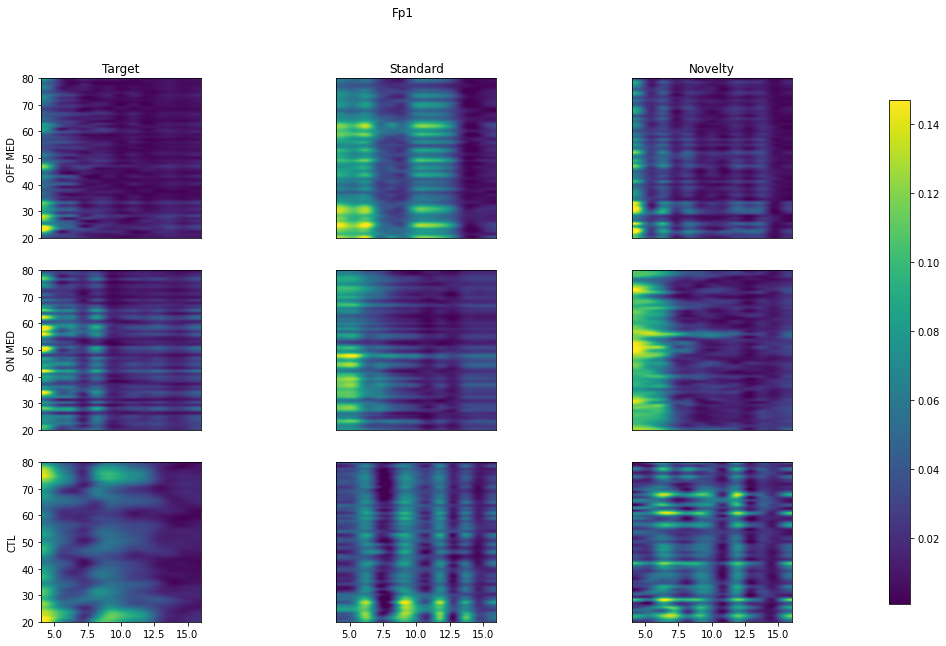

In [32]:
# Parameters
gamma = [20, 80]
beta  = [ 4, 16]

def plot_pac(pac, high_freq=gamma, low_freq=beta, ax=None, **kwargs):
    if ax is None:
        fig = plt.figure(figsize=(7, 15))
        ax = fig.subplots()

    im = ax.imshow((pac), origin='lower', interpolation='spline36', #'nearest', 
                   extent=low_freq+high_freq,
#                    aspect='auto', )
                   aspect=np.diff(low_freq)/np.diff(high_freq), **kwargs)

    if ax is None:
        plt.show()
        
    return im
# To run on server we should remove the path given to the following functions
# tasks_df = sp.create_tasks_df('D:\Master sharif\MasterProject\data\parkinsons-oddball')

# temp = tasks_df['pd_drug_type']

# off_medication = temp[temp==0].index[0]
# on_medication = temp[temp==1].index[0]
# ctl = temp[temp==2].index[0]

dict_erp = {}
_,_,dict_erp[0], dict_erp[1], dict_erp[2] = mmn_sub_calculation(tasks_df.iloc[off_medication])

_,_,dict_erp[3], dict_erp[4], dict_erp[5] = mmn_sub_calculation(tasks_df.iloc[on_medication])

_,_,dict_erp[6], dict_erp[7], dict_erp[8] = mmn_sub_calculation(tasks_df.iloc[ctl])

# channel_name = 'Fp1'
dict_pac_dist = {}
for i in np.arange(9):
    temp = pac.rid_rihaczek(dict_erp[i][channel_name],500)
    dict_pac_dist[i] = pac.tfMVL_tfd2_2d(temp,temp,gamma,beta)

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15, 10))
#     vmin, vmax = get_percent(np.log(mvl_2ds[:, :, :, ch].mean(axis=1)), 0.83)
counter = 0
for i, j in itertools.product(np.arange(3), np.arange(3)):
    im = plot_pac(dict_pac_dist[counter], ax=axs[i, j],)
#                       vmin=vmin, vmax=vmax)
    axs[i, j].xaxis.set_visible(False)
    axs[i, j].yaxis.set_visible(False)
    counter = counter + 1    
    # fig.colorbar(im, ax=axs.ravel().tolist(), location='right', shrink=0.95)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
# cbar = fig.colorbar(ims[i][j], ax=axs.ra//vel().tolist(), shrink=0.95)
groups = ['OFF MED','ON MED', 'CTL']
event_types = ['Target','Standard','Novelty']
for i in np.arange(3):
    axs[i, 0].set_ylabel(groups[i])
    axs[0, i].set_title(event_types[i])

    axs[-1, i].xaxis.set_visible(True)
    axs[i, 0].yaxis.set_visible(True)
fig.suptitle(f'{channel_name}', fontsize=12)

# Save PAC in mat file

In [33]:
ctl_id = tasks_df['participant_id'][ctl]
off_id = tasks_df['participant_id'][off_medication]
on_id = tasks_df['participant_id'][on_medication]

Nov_ctl_path = 'D:\\Mastersharif\\MasterProject\\data\\parkinsons-oddball\\pac_data\\ctl\\Novelty\\' + f'ch_{channel_name}_{ctl_id}_Hi{gamma[0]}_{gamma[1]}_low{beta[0]}_{beta[1]}'
Sta_ctl_path = 'D:\\Mastersharif\\MasterProject\\data\\parkinsons-oddball\\pac_data\\ctl\\Standard\\' + f'ch_{channel_name}_{ctl_id}_Hi{gamma[0]}_{gamma[1]}_low{beta[0]}_{beta[1]}'
Tar_ctl_path = 'D:\\Mastersharif\\MasterProject\\data\\parkinsons-oddball\\pac_data\\ctl\\Target\\' + f'ch_{channel_name}_{ctl_id}_Hi{gamma[0]}_{gamma[1]}_low{beta[0]}_{beta[1]}'
Nov_off_path = 'D:\\Mastersharif\\MasterProject\\data\\parkinsons-oddball\\pac_data\\off\\Novelty\\'+ f'ch_{channel_name}_{off_id}_Hi{gamma[0]}_{gamma[1]}_low{beta[0]}_{beta[1]}'
Sta_off_path = 'D:\\Mastersharif\\MasterProject\\data\\parkinsons-oddball\\pac_data\\off\\Standard\\'+ f'ch_{channel_name}_{off_id}_Hi{gamma[0]}_{gamma[1]}_low{beta[0]}_{beta[1]}'
Tar_off_path = 'D:\\Mastersharif\\MasterProject\\data\\parkinsons-oddball\\pac_data\\off\\Target\\'+ f'ch_{channel_name}_{off_id}_Hi{gamma[0]}_{gamma[1]}_low{beta[0]}_{beta[1]}'
Nov_on_path = 'D:\\Mastersharif\\MasterProject\\data\\parkinsons-oddball\\pac_data\\on\\Novelty\\'+ f'ch_{channel_name}_{on_id}_Hi{gamma[0]}_{gamma[1]}_low{beta[0]}_{beta[1]}'
Sta_on_path = 'D:\\Mastersharif\\MasterProject\\data\\parkinsons-oddball\\pac_data\\on\\Standard\\'+ f'ch_{channel_name}_{on_id}_Hi{gamma[0]}_{gamma[1]}_low{beta[0]}_{beta[1]}'
Tar_on_path = 'D:\\Mastersharif\\MasterProject\\data\\parkinsons-oddball\\pac_data\\on\\Target\\'+ f'ch_{channel_name}_{on_id}_Hi{gamma[0]}_{gamma[1]}_low{beta[0]}_{beta[1]}'


np.savez_compressed(Tar_off_path,
                        dict_pac_dist[0])
np.savez_compressed(Sta_off_path,
                        dict_pac_dist[1])
np.savez_compressed(Nov_off_path,
                        dict_pac_dist[2])

np.savez_compressed(Tar_on_path,
                        dict_pac_dist[3])
np.savez_compressed(Sta_on_path,
                        dict_pac_dist[4])
np.savez_compressed(Nov_on_path,
                        dict_pac_dist[5])

np.savez_compressed(Tar_ctl_path,
                        dict_pac_dist[6])
np.savez_compressed(Sta_ctl_path,
                        dict_pac_dist[7])
np.savez_compressed(Nov_ctl_path,
                        dict_pac_dist[8])

off_mededication = {}
on_medication = {}
ctl = {}



# Load PAC 

Text(0.5, 0.98, 'Fp1')

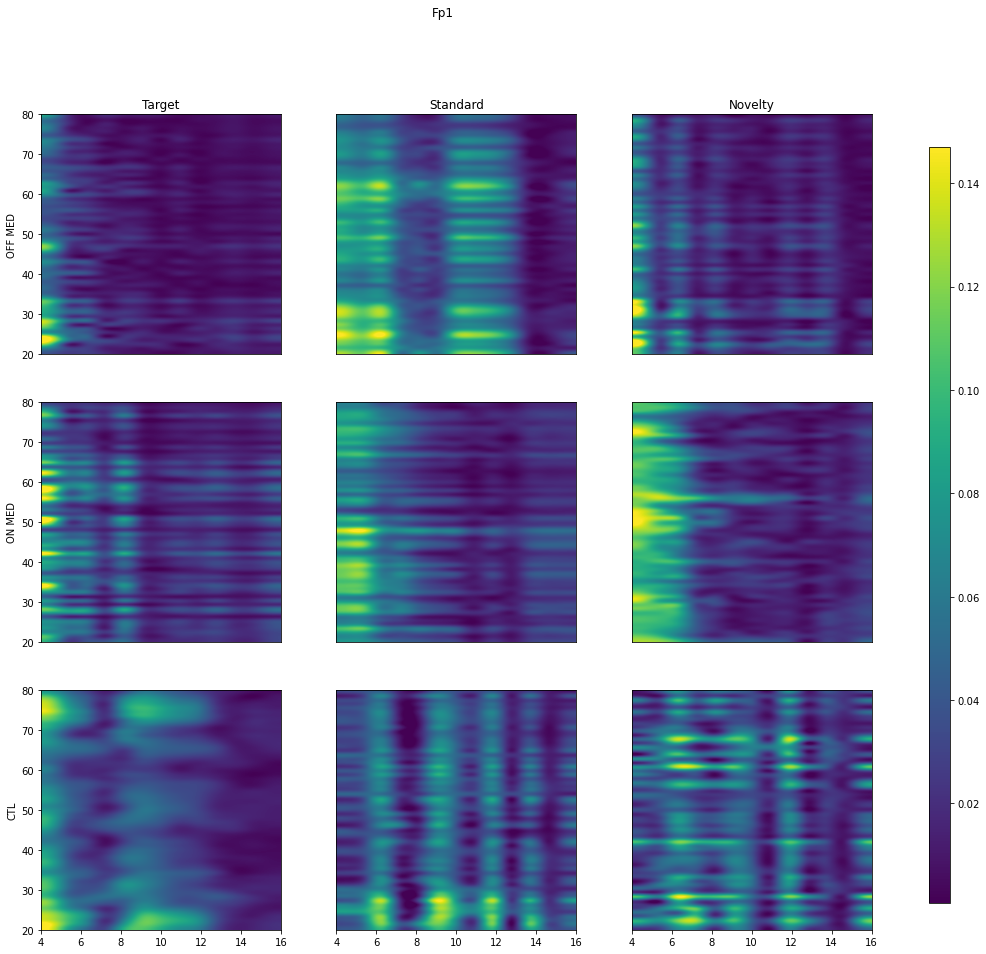

In [34]:
pac_dict = {}
# here we can use for loop, but I don't know why I choose to use copy all the lines
pac_dict[0] = np.load(Tar_off_path+'.npz')
pac_dict[1] = np.load(Sta_off_path+'.npz')
pac_dict[2] = np.load(Nov_off_path+'.npz')

pac_dict[3] = np.load(Tar_on_path+'.npz')
pac_dict[4] = np.load(Sta_on_path+'.npz')
pac_dict[5] = np.load(Nov_on_path+'.npz')

pac_dict[6] = np.load(Tar_ctl_path+'.npz')
pac_dict[7] = np.load(Sta_ctl_path+'.npz')
pac_dict[8] = np.load(Nov_ctl_path+'.npz')

pac_dict[0] = pac_dict[0][pac_dict[0].files[0]]
pac_dict[1] = pac_dict[1][pac_dict[1].files[0]]
pac_dict[2] = pac_dict[2][pac_dict[2].files[0]]
pac_dict[3] = pac_dict[3][pac_dict[3].files[0]]
pac_dict[4] = pac_dict[4][pac_dict[4].files[0]]
pac_dict[5] = pac_dict[5][pac_dict[5].files[0]]
pac_dict[6] = pac_dict[6][pac_dict[6].files[0]]
pac_dict[7] = pac_dict[7][pac_dict[7].files[0]]
pac_dict[8] = pac_dict[8][pac_dict[8].files[0]]

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15, 15))
#     vmin, vmax = get_percent(np.log(mvl_2ds[:, :, :, ch].mean(axis=1)), 0.83)
counter = 0
for i, j in itertools.product(np.arange(3), np.arange(3)):
    im = plot_pac(pac_dict[counter], ax=axs[i, j],)
#                       vmin=vmin, vmax=vmax)
    axs[i, j].xaxis.set_visible(False)
    axs[i, j].yaxis.set_visible(False)
    counter = counter + 1    
    # fig.colorbar(im, ax=axs.ravel().tolist(), location='right', shrink=0.95)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
# cbar = fig.colorbar(ims[i][j], ax=axs.ra//vel().tolist(), shrink=0.95)
groups = ['OFF MED','ON MED', 'CTL']
event_types = ['Target','Standard','Novelty']
for i in np.arange(3):
    axs[i, 0].set_ylabel(groups[i])
    axs[0, i].set_title(event_types[i])

    axs[-1, i].xaxis.set_visible(True)
    axs[i, 0].yaxis.set_visible(True)
fig.suptitle(f'{channel_name}', fontsize=12)


# Plot PAC time

In [ ]:
def mmn_sub_calculation(task):
    raw = mne.io.read_raw_eeglab(os.path.join(task['dir'], 'pre_' + task['file_formatter'].format('eeg.set')),
                                 preload=True, verbose=0)
    for ch in raw._data:
        ch -= ch.mean()
        ch /= ch.std()
        ch *= 1e-6
   
    montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
    raw.set_montage(montage)

    events, event_dict = mne.events_from_annotations(raw, verbose=0)
    epochs = mne.Epochs(raw, events, event_id=event_dict,
                        tmin=-0.2, tmax=1, preload=True, verbose=0)


    selected_events = ['S200', 'S201', 'S202']
    erps = {}
    